In [14]:
import requests
from PIL import Image, ImageSequence
import numpy as np
import matplotlib.pyplot as plt
import io

import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
# 拉取验证码图片
url = "https://pass.hust.edu.cn/cas/code"
UA = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Safari/537.36"

headers = {
    "User-Agent":UA,
}


response = requests.get(url, headers=headers)
# with open("code.gif", "wb") as f:
#     f.write(response.content)

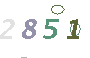

In [13]:
img = Image.open(io.BytesIO(response.content))
img.seek(1) # 帧指针指向第二帧
img

预处理+分割

In [ ]:
arr1 = np.zeros((58,90))
for frame in ImageSequence.Iterator(img):
    arr2 = np.array(frame.convert('L'))
    # print(arr2.shape)
    arr1 += arr2  
arr1 = arr1//4

arr1 = (arr1<210)*255 #阈值化
merged_image = Image.fromarray(arr1) #从numpy数组转换回图片
merged_image = merged_image.convert('L') #转为灰度图
d1 = merged_image.crop(( 0, 16, 16, 40))
d2 = merged_image.crop((22, 16, 38, 40))
d3 = merged_image.crop((44, 16, 60, 40))
d4 = merged_image.crop((66, 16, 82, 40))